## Connect to Google Drive + Load in libraries

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
! pip install praw pandas vaderSentiment textblob --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 8.2 MB/s eta 0:00:00


In [5]:
import praw

1. Specify the full path to the file

In [6]:
file_fold = '/content/drive/Shareddrives/CSC 5541/Final Project/Annotation/'

In [7]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

MindLinc (Mindful Language Understanding for Interventions and Context):


Comparing different models (Textblob/vader, trained bert and Mindlinc across different subsets of data)

In [8]:
analyzer = SentimentIntensityAnalyzer()

In [9]:
import pandas as pd
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
import numpy as np

## Create Dataset

In [10]:
df_gender = pd.read_excel(file_fold + 'combined_dataset_Final_Gender.xlsx')
df_none = pd.read_excel(file_fold + 'combined_dataset_Final_None.xlsx')
df_queer = pd.read_excel(file_fold + 'combined_dataset_Final_Queer.xlsx')
df_race = pd.read_excel(file_fold + 'combined_dataset_Final_Race.xlsx')

In [11]:
# no uppercase
df_gender.columns = df_gender.columns.str.strip().str.lower()
df_none.columns = df_none.columns.str.strip().str.lower()
df_queer.columns = df_queer.columns.str.strip().str.lower()
df_race.columns = df_race.columns.str.strip().str.lower()

In [12]:
df_none = df_none[
    df_none['label_mental_health'].isin([0, 1])
].copy()

df_gender = df_gender[
    df_gender['label_gender_identity'].isin([0, 1]) &
    df_gender['label_mental_health'].isin([0, 1])
].copy()

df_queer = df_queer[
    df_queer['label_queer_identity'].isin([0, 1]) &
    df_queer['label_mental_health'].isin([0, 1])
].copy()

df_race = df_race[
    df_race['label_racial_identity'].isin([0, 1]) &
    df_race['label_mental_health'].isin([0, 1])
].copy()


2. Check the column names of each dataset to make sure they have the same structure

In [13]:
print("Gender DataFrame column name:", df_gender.columns.tolist())
print("None DataFrame  column name:", df_none.columns.tolist())
print("Queer DataFrame  column name:", df_queer.columns.tolist())
print("Race DataFrame  column name:", df_race.columns.tolist())

Gender DataFrame column name: ['author', 'created_utc', 'score', 'selftext', 'subreddit', 'title', 'timestamp', 'label_mental_health', 'disorder', 'diagnoised', 'seekinghelp_copingmechanisms', 'details', 'label_gender_identity', 'matched_gender_word', 'gender_identity', 'details', 'label_racial_identity', 'matched_racial_word', 'race_identity', 'race_identity_specific', 'label_queer_identity', 'matched_queer_word', 'queer_identity', 'extra_comments']
None DataFrame  column name: ['author', 'created_utc', 'score', 'selftext', 'subreddit', 'title', 'timestamp', 'label_mental_health', 'disorder', 'diagnoised', 'seekinghelp_copingmechanisms', 'details', 'label_gender_identity', 'matched_gender_word', 'gender_identity', 'details', 'label_racial_identity', 'matched_racial_word', 'race_identity', 'race_identity_specific', 'label_queer_identity', 'matched_queer_word', 'queer_identity', 'extra_comments']
Queer DataFrame  column name: ['author', 'created_utc', 'score', 'selftext', 'subreddit', '

3. Merge datasets

In [14]:
# First check the size of each dataset
print(f"Gender dataset: {df_gender.shape[0]} rows, {df_gender.shape[1]} columns")
print(f"None dataset: {df_none.shape[0]} rows, {df_none.shape[1]} columns")
df_gender['Unnamed: 24'] = np.nan
df_none['Unnamed: 24'] = np.nan
print(f"Queer dataset: {df_queer.shape[0]} rows, {df_queer.shape[1]} columns")
print(f"Race dataset: {df_race.shape[0]} rows, {df_race.shape[1]} columns")

Gender dataset: 286 rows, 24 columns
None dataset: 959 rows, 24 columns
Queer dataset: 591 rows, 25 columns
Race dataset: 102 rows, 25 columns


In [15]:
# For details1
# Rename column 11 to 'details_MH'
df_gender.columns.values[11] = 'details_MH'
df_none.columns.values[11] = 'details_MH'
df_queer.columns.values[11] = 'details_MH'
df_race.columns.values[11] = 'details_MH'

# Rename column 15 to 'details_gender'
df_gender.columns.values[15] = 'details_gender'
df_none.columns.values[15] = 'details_gender'
df_queer.columns.values[15] = 'details_gender'
df_race.columns.values[15] = 'details_gender'


# no uppercase
df_gender.columns = df_gender.columns.str.strip().str.lower()
df_none.columns = df_none.columns.str.strip().str.lower()
df_queer.columns = df_queer.columns.str.strip().str.lower()
df_race.columns = df_race.columns.str.strip().str.lower()

# Now check if columns are consistent
print(f"Gender columns: {df_gender.columns.tolist()}")
print(f"None columns: {df_none.columns.tolist()}")
print(f"Queer columns: {df_queer.columns.tolist()}")
print(f"Race columns: {df_race.columns.tolist()}")


Gender columns: ['author', 'created_utc', 'score', 'selftext', 'subreddit', 'title', 'timestamp', 'label_mental_health', 'disorder', 'diagnoised', 'seekinghelp_copingmechanisms', 'details_mh', 'label_gender_identity', 'matched_gender_word', 'gender_identity', 'details_gender', 'label_racial_identity', 'matched_racial_word', 'race_identity', 'race_identity_specific', 'label_queer_identity', 'matched_queer_word', 'queer_identity', 'extra_comments', 'unnamed: 24']
None columns: ['author', 'created_utc', 'score', 'selftext', 'subreddit', 'title', 'timestamp', 'label_mental_health', 'disorder', 'diagnoised', 'seekinghelp_copingmechanisms', 'details_mh', 'label_gender_identity', 'matched_gender_word', 'gender_identity', 'details_gender', 'label_racial_identity', 'matched_racial_word', 'race_identity', 'race_identity_specific', 'label_queer_identity', 'matched_queer_word', 'queer_identity', 'extra_comments', 'unnamed: 24']
Queer columns: ['author', 'created_utc', 'score', 'selftext', 'subredd

In [16]:
# Merge all datasets
#Drop any duplicates
combined_df = pd.concat([df_gender, df_none, df_queer, df_race], ignore_index=True)
combined_df = combined_df.drop_duplicates(subset=['author', 'created_utc', 'score', 'selftext', 'subreddit', 'title', 'timestamp'], keep='first')
print(f"Merged dataset: {combined_df.shape[0]} rows, {combined_df.shape[1]} columns")

Merged dataset: 1841 rows, 25 columns


In [19]:
# Cols that need None
cols_to_replace_with_none = ['disorder', 'gender_identity', 'race_identity', 'queer_identity']

# replaces nans with none
combined_df[cols_to_replace_with_none] = combined_df[cols_to_replace_with_none].fillna('None')

# fill rest with 0s
combined_df.fillna(0, inplace=True)

In [20]:
# List of columns to modify
columns_to_lowercase = ['disorder', 'gender_identity', 'race_identity', 'queer_identity']

# Iterate through each column and apply .str.lower()
for col in columns_to_lowercase:
    if col in combined_df.columns:
        combined_df[col] = combined_df[col].str.lower()


In [ ]:
combined_df.to_excel(file_fold + 'combined_data_FINAL.xlsx', index=False)

# BERT_Sentiment

In [22]:
print("Combined DataFrame  column name:", combined_df.columns.tolist())
print(f"Merged dataset: {combined_df.shape[0]} rows, {combined_df.shape[1]} columns")

Combined DataFrame  column name: ['author', 'created_utc', 'score', 'selftext', 'subreddit', 'title', 'timestamp', 'label_mental_health', 'disorder', 'diagnoised', 'seekinghelp_copingmechanisms', 'details_mh', 'label_gender_identity', 'matched_gender_word', 'gender_identity', 'details_gender', 'label_racial_identity', 'matched_racial_word', 'race_identity', 'race_identity_specific', 'label_queer_identity', 'matched_queer_word', 'queer_identity', 'extra_comments', 'unnamed: 24']
Merged dataset: 1841 rows, 25 columns


In [23]:
from transformers import pipeline

In [24]:
analyzer = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


In [25]:
def clean_text(text):
    if isinstance(text, str):
        text = re.sub(r'http\S+', '', text)
        text = re.sub(r'&gt;.*?\n', '', text)
        text = re.sub(r'\s+', ' ', text)
        text = re.sub(r'[^\w\s.,!?;:\-\'\"()]', '', text)
        return text.strip()
    return ""

In [27]:
text_column = 'selftext'
if text_column in combined_df.columns:

    combined_df['cleaned_text'] = combined_df[text_column].apply(clean_text)


    combined_df['text_length'] = combined_df['cleaned_text'].apply(len)
    print("Text length statistics:")
    print(combined_df['text_length'].describe())

Text length statistics:
count     1841.000000
mean       998.475285
std       1007.934861
min          0.000000
25%        346.000000
50%        718.000000
75%       1308.000000
max      11476.000000
Name: text_length, dtype: float64


In [28]:
MAX_LENGTH = 3000
combined_df['truncated_text'] = combined_df['cleaned_text'].apply(
        lambda x: x[:MAX_LENGTH] if len(x) > MAX_LENGTH else x
    )

combined_df.to_csv(file_fold + 'preprocessed_mental_health_data.csv', index=False)
print("Data preprocessing is completed and saved")

Data preprocessing is completed and saved


# Sentiment Analysis

In [49]:
from transformers import AutoTokenizer, pipeline

MODEL_NAME = "distilbert-base-uncased-finetuned-sst-2-english"

tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
sentiment_pipeline = pipeline("sentiment-analysis", model=MODEL_NAME)

def bert_sentiment_full(text: str, max_len: int = 512):
    """Run DistilBERT on arbitrarily long text by chunking.

    Returns
    -------
    label : str
        'positive' or 'negative'
    mean_score : float
        Average probability score across chunks.
    n_chunks : int
        Number of chunks the text was split into.
    """
    encoding = tokenizer(text, add_special_tokens=True, truncation=True, max_length=max_len)
    input_ids = encoding['input_ids']

    chunks = [input_ids[i:i + max_len] for i in range(0, len(input_ids), max_len)]
    chunks = [chunk[:max_len] for chunk in chunks]

    chunk_texts = [tokenizer.decode(chunk, skip_special_tokens=True) for chunk in chunks]

    outputs = sentiment_pipeline(chunk_texts)

    #debug
    #print("Outputs from the model:", outputs)

    #vote for label
    labels = [out['label'].lower() for out in outputs]
    label = max(set(labels), key=labels.count)

    mean_score = sum(out['score'] for out in outputs) / len(outputs)

    #debug
    #print(f"Sentiment Label: {label}, Mean Score: {mean_score}, Number of Chunks: {len(chunks)}")

    return label, mean_score, len(chunks)


Device set to use cpu


In [50]:
# Use the entire dataset (no sample size restriction)
full_analysis_df = combined_df.copy()
#debug
#full_analysis_df=full_analysis_df[1:10]
# Initialize BERT sentiment analysis pipeline
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

# Store analysis results
results = []

# Ensure the 'cleaned_text' column exists
text_column_for_analysis = 'cleaned_text'

if text_column_for_analysis not in full_analysis_df.columns:
    print(f"Error: Column '{text_column_for_analysis}' not found in the dataset.")
else:
    # Perform sentiment analysis for each piece of text
    for idx, row in full_analysis_df.iterrows():
        text = row[text_column_for_analysis]

        # Skip empty text
        if pd.isna(text) or text == "":
            continue

        bert_label, bert_score, n_chunks = bert_sentiment_full(text)

        # Append result
        result_dict = {
            'text_id': idx,
            'bert_score': bert_score,
            'bert_label': bert_label,
            # Include demographic information
            'gender_identity': row.get('Gender_Identity', ''),
            'racial_identity': row.get('race_identity', ''),
            'queer_identity': row.get('queer_identity', '')
        }

        results.append(result_dict)

    # Create results DataFrame
    results_df = pd.DataFrame(results)

    # Save the complete results
    results_df.to_csv(file_fold + 'full_sentiment_analysis_results.csv', index=False)

    print(f"Analysis complete. A total of {len(results_df)} texts were processed.")

Device set to use cpu


Analysis complete. A total of 1782 texts were processed.


In [51]:
results_df

,text_id,bert_score,bert_label,gender_identity,racial_identity,queer_identity
0,0,0.997929,negative,,none,none
1,1,0.997667,negative,,none,none
2,2,0.999688,negative,,none,none
3,3,0.987481,negative,,none,none
4,4,0.991932,negative,,none,none
...,...,...,...,...,...,...
1777,1930,0.993998,negative,,european,none
1778,1931,0.995621,negative,,none,none
1779,1932,0.998812,negative,,asian,none
1780,1933,0.992416,negative,,asian,none


In [52]:
# Sentiment distribution analysis by demographic groups

# 1. Group by gender
if 'gender_identity' in results_df.columns:
    # Use crosstab instead of groupby and value_counts
    gender_cross = pd.crosstab(
        results_df['gender_identity'],
        results_df['bert_label'],
        normalize='index'
    ) * 100

    print("\nSentiment distribution by gender:")
    for gender in results_df['gender_identity'].unique():
        if pd.notna(gender) and gender != '':
            subset = results_df[results_df['gender_identity'] == gender]
            sentiment_counts = subset['bert_label'].value_counts()
            total = len(subset)
            print(f"\n{gender} (Total: {total} entries):")
            for sentiment, count in sentiment_counts.items():
                print(f"  {sentiment}: {count} entries ({count/total*100:.1f}%)")

# 2. Group by racial identity
if 'racial_identity' in results_df.columns:
    race_cross = pd.crosstab(
        results_df['racial_identity'],
        results_df['bert_label'],
        normalize='index'
    ) * 100

    print("\nSentiment distribution by racial identity:")
    for race in results_df['racial_identity'].unique():
        if pd.notna(race) and race != '':
            subset = results_df[results_df['racial_identity'] == race]
            sentiment_counts = subset['bert_label'].value_counts()
            total = len(subset)
            print(f"\n{race} (Total: {total} entries):")
            for sentiment, count in sentiment_counts.items():
                print(f"  {sentiment}: {count} entries ({count/total*100:.1f}%)")

# 3. Group by queer identity
if 'queer_identity' in results_df.columns:
    queer_cross = pd.crosstab(
        results_df['queer_identity'],
        results_df['bert_label'],
        normalize='index'
    ) * 100

    print("\nSentiment distribution by queer identity:")
    for queer in results_df['queer_identity'].unique():
        if pd.notna(queer) and queer != '':
            subset = results_df[results_df['queer_identity'] == queer]
            sentiment_counts = subset['bert_label'].value_counts()
            total = len(subset)
            print(f"\n{queer} (Total: {total} entries):")
            for sentiment, count in sentiment_counts.items():
                print(f"  {sentiment}: {count} entries ({count/total*100:.1f}%)")



Sentiment distribution by gender:

Sentiment distribution by racial identity:

none (Total: 1704 entries):
  negative: 1531 entries (89.8%)
  positive: 173 entries (10.2%)

asian (Total: 37 entries):
  negative: 34 entries (91.9%)
  positive: 3 entries (8.1%)

hispanic (Total: 6 entries):
  negative: 6 entries (100.0%)

european (Total: 16 entries):
  negative: 14 entries (87.5%)
  positive: 2 entries (12.5%)

united states (Total: 5 entries):
  negative: 5 entries (100.0%)

asian, european (Total: 2 entries):
  positive: 2 entries (100.0%)

canada (Total: 1 entries):
  negative: 1 entries (100.0%)

latino (Total: 2 entries):
  negative: 2 entries (100.0%)

united states, latino (Total: 1 entries):
  negative: 1 entries (100.0%)

white (Total: 3 entries):
  negative: 3 entries (100.0%)

african (Total: 4 entries):
  negative: 3 entries (75.0%)
  positive: 1 entries (25.0%)

asian, white (Total: 1 entries):
  negative: 1 entries (100.0%)

Sentiment distribution by queer identity:

none

## Visualization

In [57]:
# 4. Visualization of Results

import matplotlib.pyplot as plt

colors = {
    'positive': '#4CAF50',  # Green
    'negative': '#2196F3'   # Blue
}
# Create a directory to save the figures
import os
figures_dir = file_fold + 'figures/'
if not os.path.exists(figures_dir):
    os.makedirs(figures_dir)

# Set Seaborn style for better aesthetics
import seaborn as sns
sns.set(style="whitegrid")
plt.rcParams.update({'font.size': 12})

from scipy import stats

### Unified Visualization

In [59]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os


# Set visual style
sns.set(style="whitegrid")
plt.rcParams.update({'font.size': 12})

# Create folder for saving figures
figures_dir = file_fold + 'figures/'
if not os.path.exists(figures_dir):
    os.makedirs(figures_dir)

# === Generalized plotting function ===
def plot_sentiment_distribution(df, identity_col, title, filename, simplify_func=None, top_categories=None, rotate_labels=False):
    # Filter rows with non-empty identity
    filtered_df = df[df[identity_col].notna() & (df[identity_col] != '')].copy()

    # Apply simplification function if provided (for queer identities)
    if simplify_func:
        filtered_df['main_identity'] = filtered_df[identity_col].apply(simplify_func)
        identity_used = 'main_identity'
    else:
        identity_used = identity_col

    # Filter to top categories if specified
    if top_categories:
        filtered_df = filtered_df[filtered_df[identity_used].isin(top_categories)]

    # Get counts for label display
    identity_counts = filtered_df[identity_used].value_counts()

    # Create cross-tab of sentiment distribution
    cross_tab = pd.crosstab(
        filtered_df[identity_used],
        filtered_df['bert_label'],
        normalize='index'
    ) * 100

    # Start plotting
    plt.figure(figsize=(14, 8))
    bottom = np.zeros(len(cross_tab))
    x = np.arange(len(cross_tab.index))

    for sentiment in ['positive', 'negative']:
        values = cross_tab[sentiment].values if sentiment in cross_tab.columns else np.zeros(len(cross_tab))
        plt.bar(x, values, bottom=bottom, label=sentiment, color=colors[sentiment])
        bottom += values

    # Configure labels and layout
    plt.title(title, fontsize=16)
    plt.xlabel(identity_col.replace('_', ' ').title(), fontsize=14)
    plt.ylabel('Percentage (%)', fontsize=14)
    label_names = [f"{identity}\n(n={identity_counts[identity]})" for identity in cross_tab.index]
    plt.xticks(ticks=x, labels=label_names, rotation=45 if rotate_labels else 0, ha='right' if rotate_labels else 'center')
    plt.legend(title='Sentiment Category')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.ylim(0, 100)
    plt.tight_layout()
    plt.savefig(figures_dir + filename, dpi=300)
    plt.close()
    print(f"{title} chart saved as {filename}")

# === 1. Gender Identity Plot ===
if 'gender_identity' in results_df.columns:
    plot_sentiment_distribution(
        df=results_df,
        identity_col='gender_identity',
        title='Sentiment Distribution by Gender Identity Group',
        filename='BERT_gender_sentiment_distribution.png',
        rotate_labels=False
    )

# === 2. Racial Identity Plot ===
if 'racial_identity' in results_df.columns:
    plot_sentiment_distribution(
        df=results_df,
        identity_col='racial_identity',
        title='Sentiment Distribution by Racial Identity Group',
        filename='BERT_race_sentiment_distribution.png',
        rotate_labels=True
    )

# === 3. Queer Identity Plot ===
if 'queer_identity' in results_df.columns:
    # Simplify queer identities to group similar or ambiguous labels
    def simplify_queer_identity(identity):
        if 'Flag for other' in identity:
            return 'Lesbian'
        if 'Gay?' in identity:
            return 'Gay'
        if 'flag not him' in identity:
            return 'Queer'
        if ',' in identity:
            return identity.split(',')[0].strip()
        return identity

    # Only display these categories in the final chart
    top_queer_categories = ['Transgender', 'Gay', 'Bisexual', 'Queer', 'Lesbian', 'Asexuality']

    plot_sentiment_distribution(
        df=results_df,
        identity_col='queer_identity',
        title='Sentiment Distribution by Queer Identity Group',
        filename='BERT_queer_sentiment_distribution.png',
        simplify_func=simplify_queer_identity,
        top_categories=top_queer_categories,
        rotate_labels=False
    )


Sentiment Distribution by Gender Identity Group chart saved as BERT_gender_sentiment_distribution.png
Sentiment Distribution by Racial Identity Group chart saved as BERT_race_sentiment_distribution.png
Sentiment Distribution by Queer Identity Group chart saved as BERT_queer_sentiment_distribution.png


### Gender

<ipython-input-62-bfe259af82da>:43: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Sentiment Category')


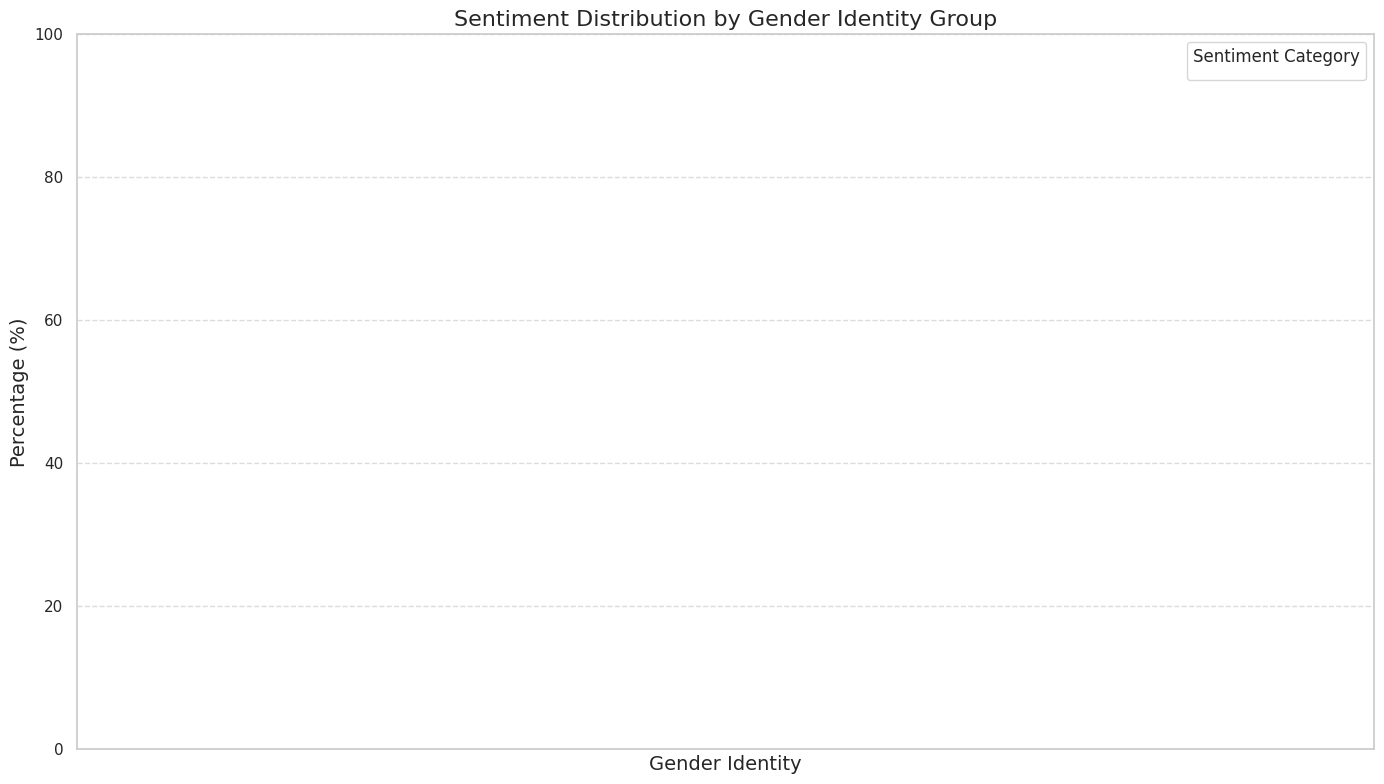

Gender identity sentiment distribution chart saved.


In [62]:
# === 1. Sentiment Distribution by Gender Identity Group - Stacked Bar Chart ===
if 'gender_identity' in results_df.columns:
    gender_viz_df = results_df[results_df['gender_identity'].notna() &
                               (results_df['gender_identity'] != '')].copy()

    exploded_df = gender_viz_df.assign(gender_identity=gender_viz_df['gender_identity'].str.split(',')).explode('gender_identity')
    exploded_df['gender_identity'] = exploded_df['gender_identity'].str.strip()

    gender_cross_new = pd.crosstab(
        exploded_df['gender_identity'],
        exploded_df['bert_label'],
        normalize='index'
    ) * 100

    identity_counts = exploded_df['gender_identity'].value_counts()

    plt.figure(figsize=(14, 8))

    bottom = np.zeros(len(gender_cross_new))
    x = np.arange(len(gender_cross_new.index))

    # List of sentiments we expect, check for their existence
    sentiments = ['positive', 'negative']

    for sentiment in sentiments:
        if sentiment in gender_cross_new.columns:
            values = gender_cross_new[sentiment].values
            bars = plt.bar(x, values, bottom=bottom, label=sentiment, color=colors.get(sentiment, 'gray'))
            bottom += values

            for i, bar in enumerate(bars):
                height = bar.get_height()
                plt.text(bar.get_x() + bar.get_width() / 2, bottom[i] - height / 2, f'{height:.1f}%',
                         ha='center', va='center', color='white', fontsize=10)

    plt.title('Sentiment Distribution by Gender Identity Group', fontsize=16)
    plt.xlabel('Gender Identity', fontsize=14)
    plt.ylabel('Percentage (%)', fontsize=14)

    plt.xticks(ticks=x, labels=[f"{identity.title()}\n(n={identity_counts.get(identity, 0)})"
                                for identity in gender_cross_new.index], rotation=45, fontsize=10)

    plt.legend(title='Sentiment Category')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.ylim(0, 100)
    plt.tight_layout()

    plt.savefig('BERT_gender_sentiment_distribution.png', dpi=300)
    plt.show()
    plt.close()

    print("Gender identity sentiment distribution chart saved.")


### Racial

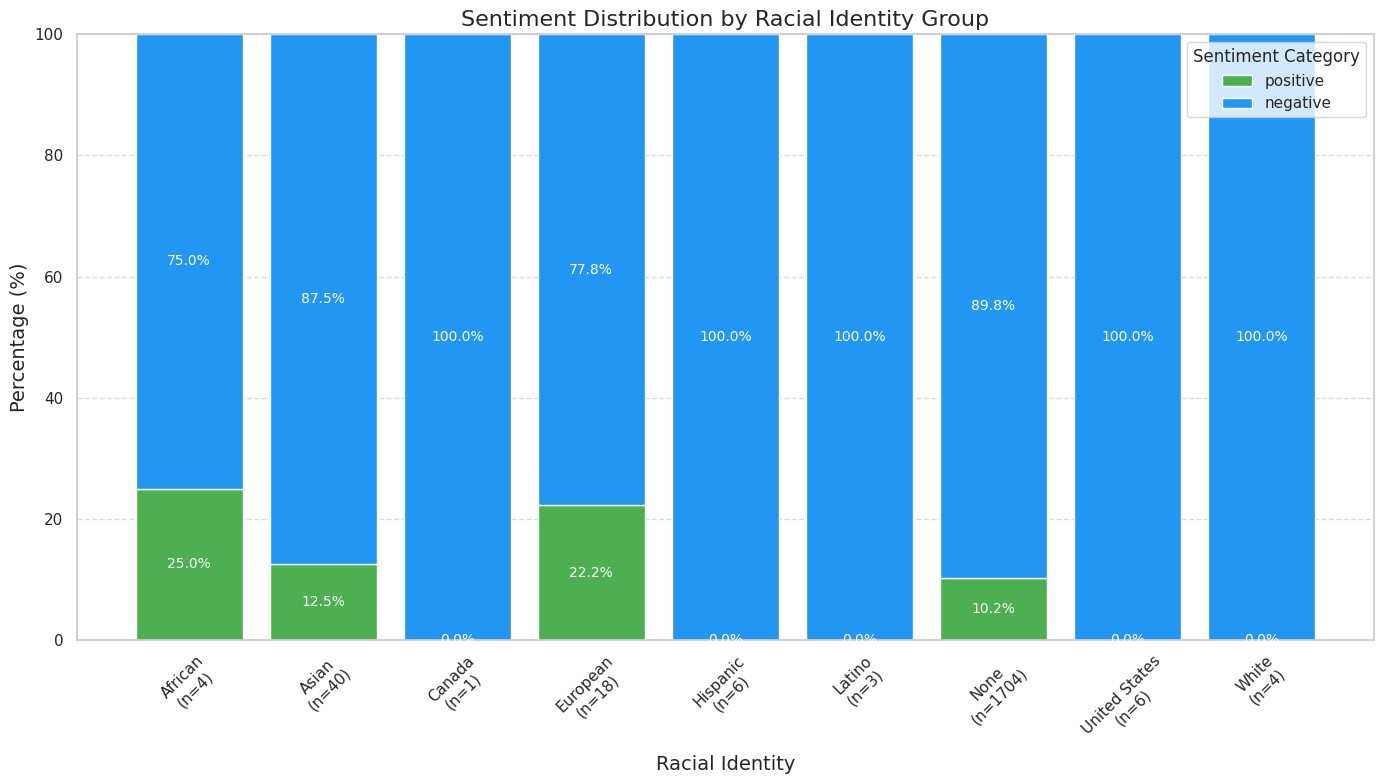

Racial identity sentiment distribution chart saved.


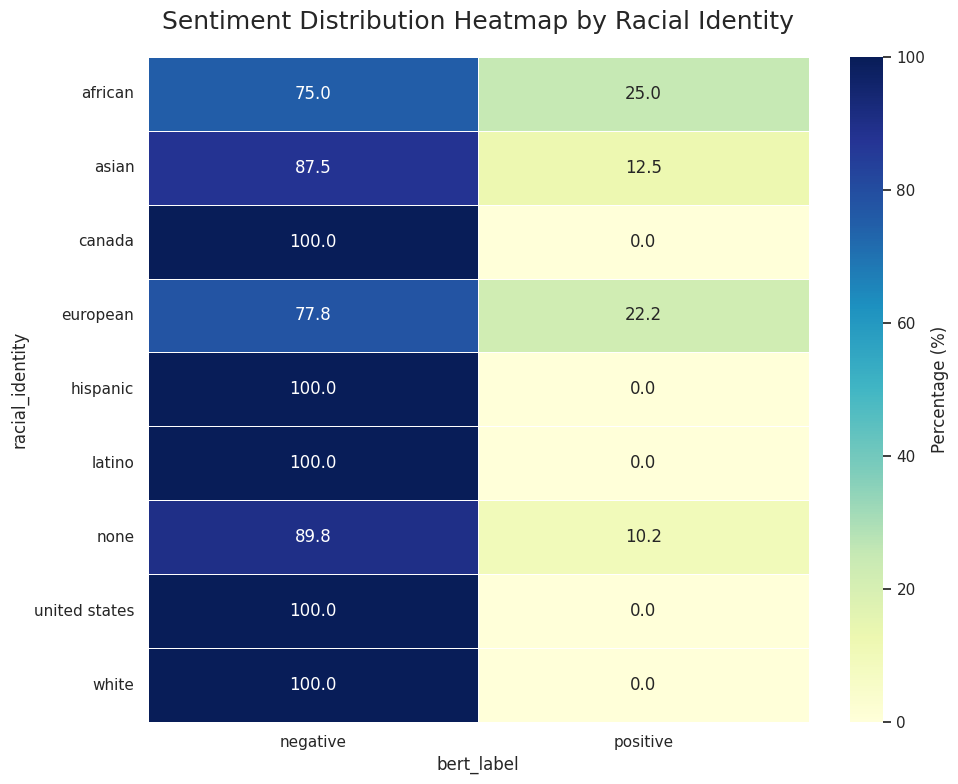

Racial identity sentiment heatmap saved.


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


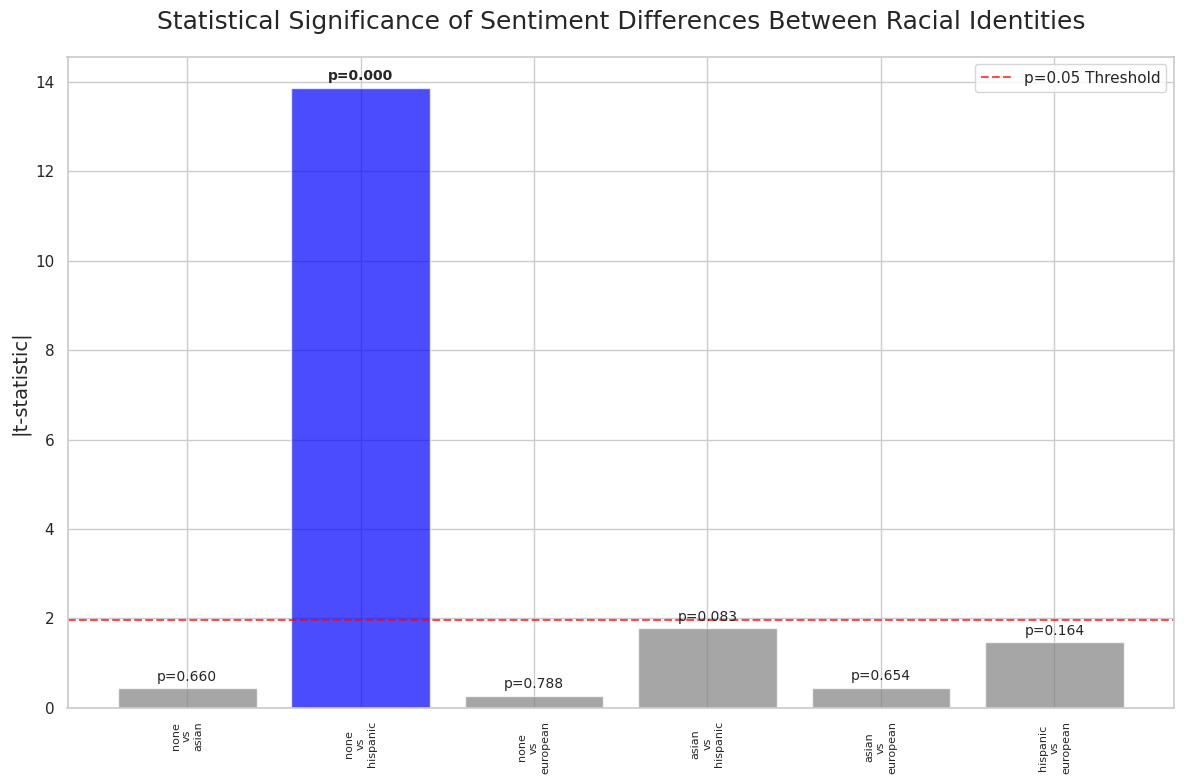

Racial identity significance testing chart saved.


In [63]:
# === 1. Sentiment Distribution by Racial Identity Group - Stacked Bar Chart ===
if 'racial_identity' in results_df.columns:
    racial_viz_df = results_df[results_df['racial_identity'].notna() &
                               (results_df['racial_identity'] != '')].copy()

    exploded_df = racial_viz_df.assign(racial_identity=racial_viz_df['racial_identity'].str.split(',')).explode('racial_identity')
    exploded_df['racial_identity'] = exploded_df['racial_identity'].str.strip()

    racial_cross_new = pd.crosstab(
        exploded_df['racial_identity'],
        exploded_df['bert_label'],
        normalize='index'
    ) * 100

    identity_counts = exploded_df['racial_identity'].value_counts()

    plt.figure(figsize=(14, 8))

    bottom = np.zeros(len(racial_cross_new))
    x = np.arange(len(racial_cross_new.index))

    # Plot each sentiment
    for sentiment in ['positive', 'negative']:
        values = racial_cross_new[sentiment].values
        bars = plt.bar(x, values, bottom=bottom, label=sentiment, color=colors[sentiment])
        bottom += values

        # Add percentages on top of the bars
        for i, bar in enumerate(bars):
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width() / 2, bottom[i] - height / 2, f'{height:.1f}%',
                     ha='center', va='center', color='white', fontsize=10)

    plt.title('Sentiment Distribution by Racial Identity Group', fontsize=16)
    plt.xlabel('Racial Identity', fontsize=14)
    plt.ylabel('Percentage (%)', fontsize=14)

    # Capitalize the first letter of each word in the label
    plt.xticks(ticks=x, labels=[f"{identity.title()}\n(n={identity_counts.get(identity, 0)})" for identity in racial_cross_new.index], rotation=45)

    plt.legend(title='Sentiment Category')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.ylim(0, 100)
    plt.tight_layout()

    plt.savefig('BERT_racial_sentiment_distribution.png', dpi=300)
    plt.show()
    plt.close()

    print("Racial identity sentiment distribution chart saved.")

    # === 2. Heatmap of Sentiment Distribution by Racial Identity Group ===
    plt.figure(figsize=(10, 8))
    sns.heatmap(racial_cross_new, annot=True, fmt='.1f', cmap='YlGnBu', linewidths=.5, cbar_kws={'label': 'Percentage (%)'})
    plt.title('Sentiment Distribution Heatmap by Racial Identity', fontsize=18, pad=20)
    plt.tight_layout()
    plt.savefig(figures_dir + 'BERT_racial_sentiment_heatmap.png', dpi=300)
    plt.show()
    plt.close()

    print("Racial identity sentiment heatmap saved.")

# === 3. Statistical Significance Testing Between Racial Groups ===
if 'racial_identity' in results_df.columns:
    results_df['sentiment_score'] = results_df['bert_label'].map({
        'positive': 1, 'neutral': 0, 'negative': -1
    })

    racial_categories = [r for r in results_df['racial_identity'].unique()
                       if pd.notna(r) and r != ''][:5]  # You can adjust the number of categories if needed

    if len(racial_categories) >= 2:
        racial_sig = []
        for i in range(len(racial_categories)):
            for j in range(i+1, len(racial_categories)):
                r1, r2 = racial_categories[i], racial_categories[j]
                scores1 = results_df[results_df['racial_identity'] == r1]['sentiment_score']
                scores2 = results_df[results_df['racial_identity'] == r2]['sentiment_score']

                if len(scores1) > 5 and len(scores2) > 5:  # Ensure enough data points for t-test
                    t_stat, p_value = stats.ttest_ind(scores1, scores2, equal_var=False)
                    racial_sig.append({
                        'Group 1': r1,
                        'Group 2': r2,
                        'Group 1 Mean': scores1.mean(),
                        'Group 2 Mean': scores2.mean(),
                        't-statistic': t_stat,
                        'p-value': p_value,
                        'Significant': p_value < 0.05
                    })

        if racial_sig:
            sig_df = pd.DataFrame(racial_sig)
            sig_df.to_csv(figures_dir + 'BERT_racial_significance_tests.csv', index=False)

            # Bar chart of t-statistics
            plt.figure(figsize=(12, 8))
            for i, row in sig_df.iterrows():
                color = 'blue' if row['Significant'] else 'gray'
                plt.bar(i, abs(row['t-statistic']), color=color, alpha=0.7)
                plt.text(i, abs(row['t-statistic'])+0.1, f"p={row['p-value']:.3f}",
                         ha='center', va='bottom', fontsize=10,
                         fontweight='bold' if row['Significant'] else 'normal')

            plt.axhline(y=1.96, color='red', linestyle='--', alpha=0.7,
                        label='p=0.05 Threshold')
            plt.xticks(range(len(sig_df)),
                       [f"{row['Group 1']}\nvs\n{row['Group 2']}" for i, row in sig_df.iterrows()],
                       rotation=90, fontsize=8)
            plt.title('Statistical Significance of Sentiment Differences Between Racial Identities', fontsize=18, pad=20)
            plt.ylabel('|t-statistic|', fontsize=14)
            plt.legend()
            plt.tight_layout()
            plt.savefig(figures_dir + 'BERT_racial_significance_tests.png', dpi=300)
            plt.show()
            plt.close()

            print("Racial identity significance testing chart saved.")


### Queer


Diagnostic analysis of queer identity data

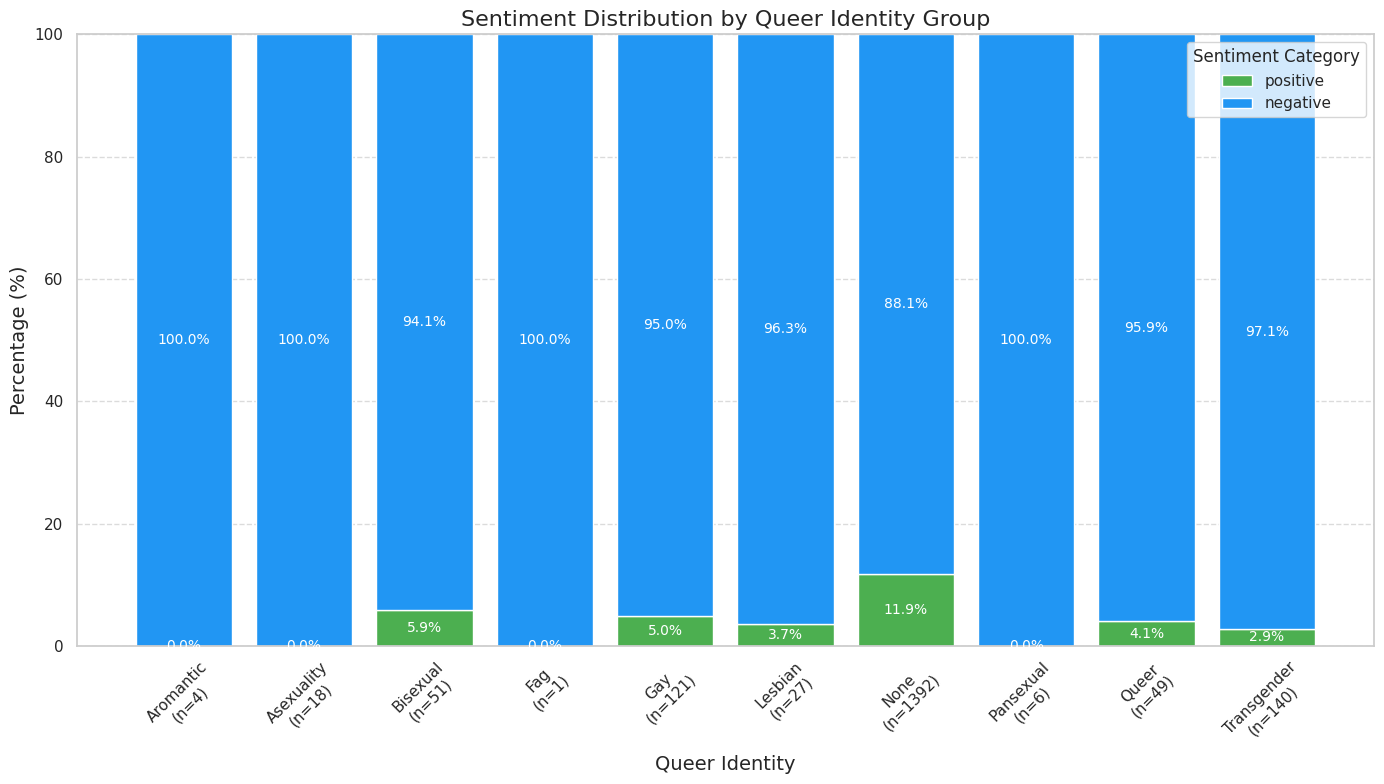

Queer identity sentiment distribution chart saved.


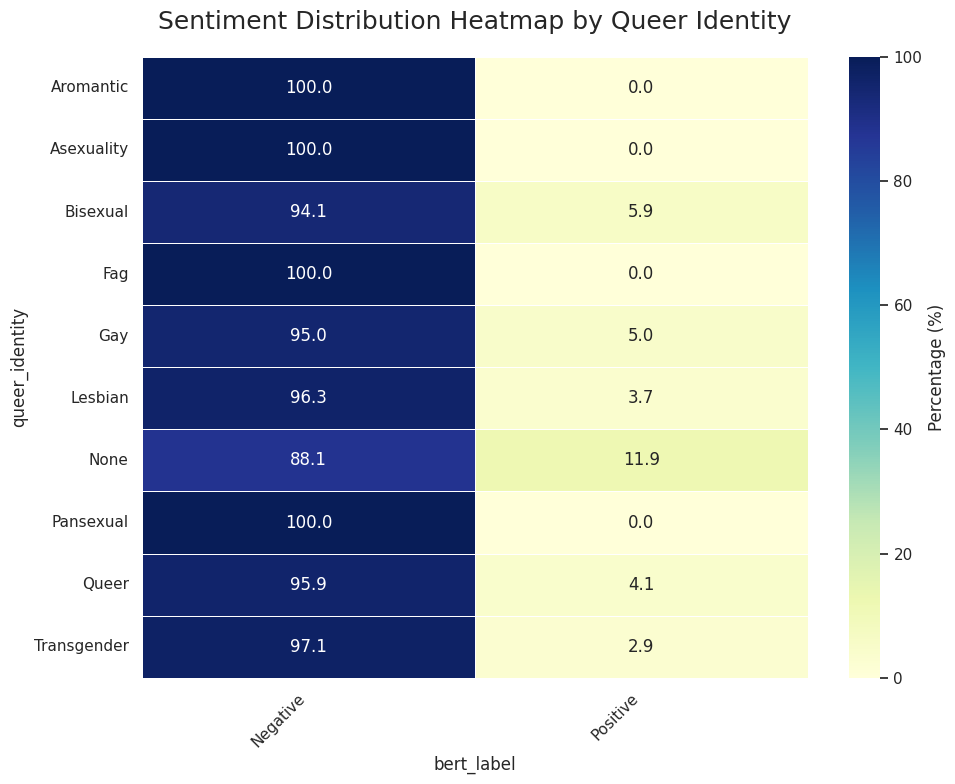

Queer identity sentiment heatmap saved.


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


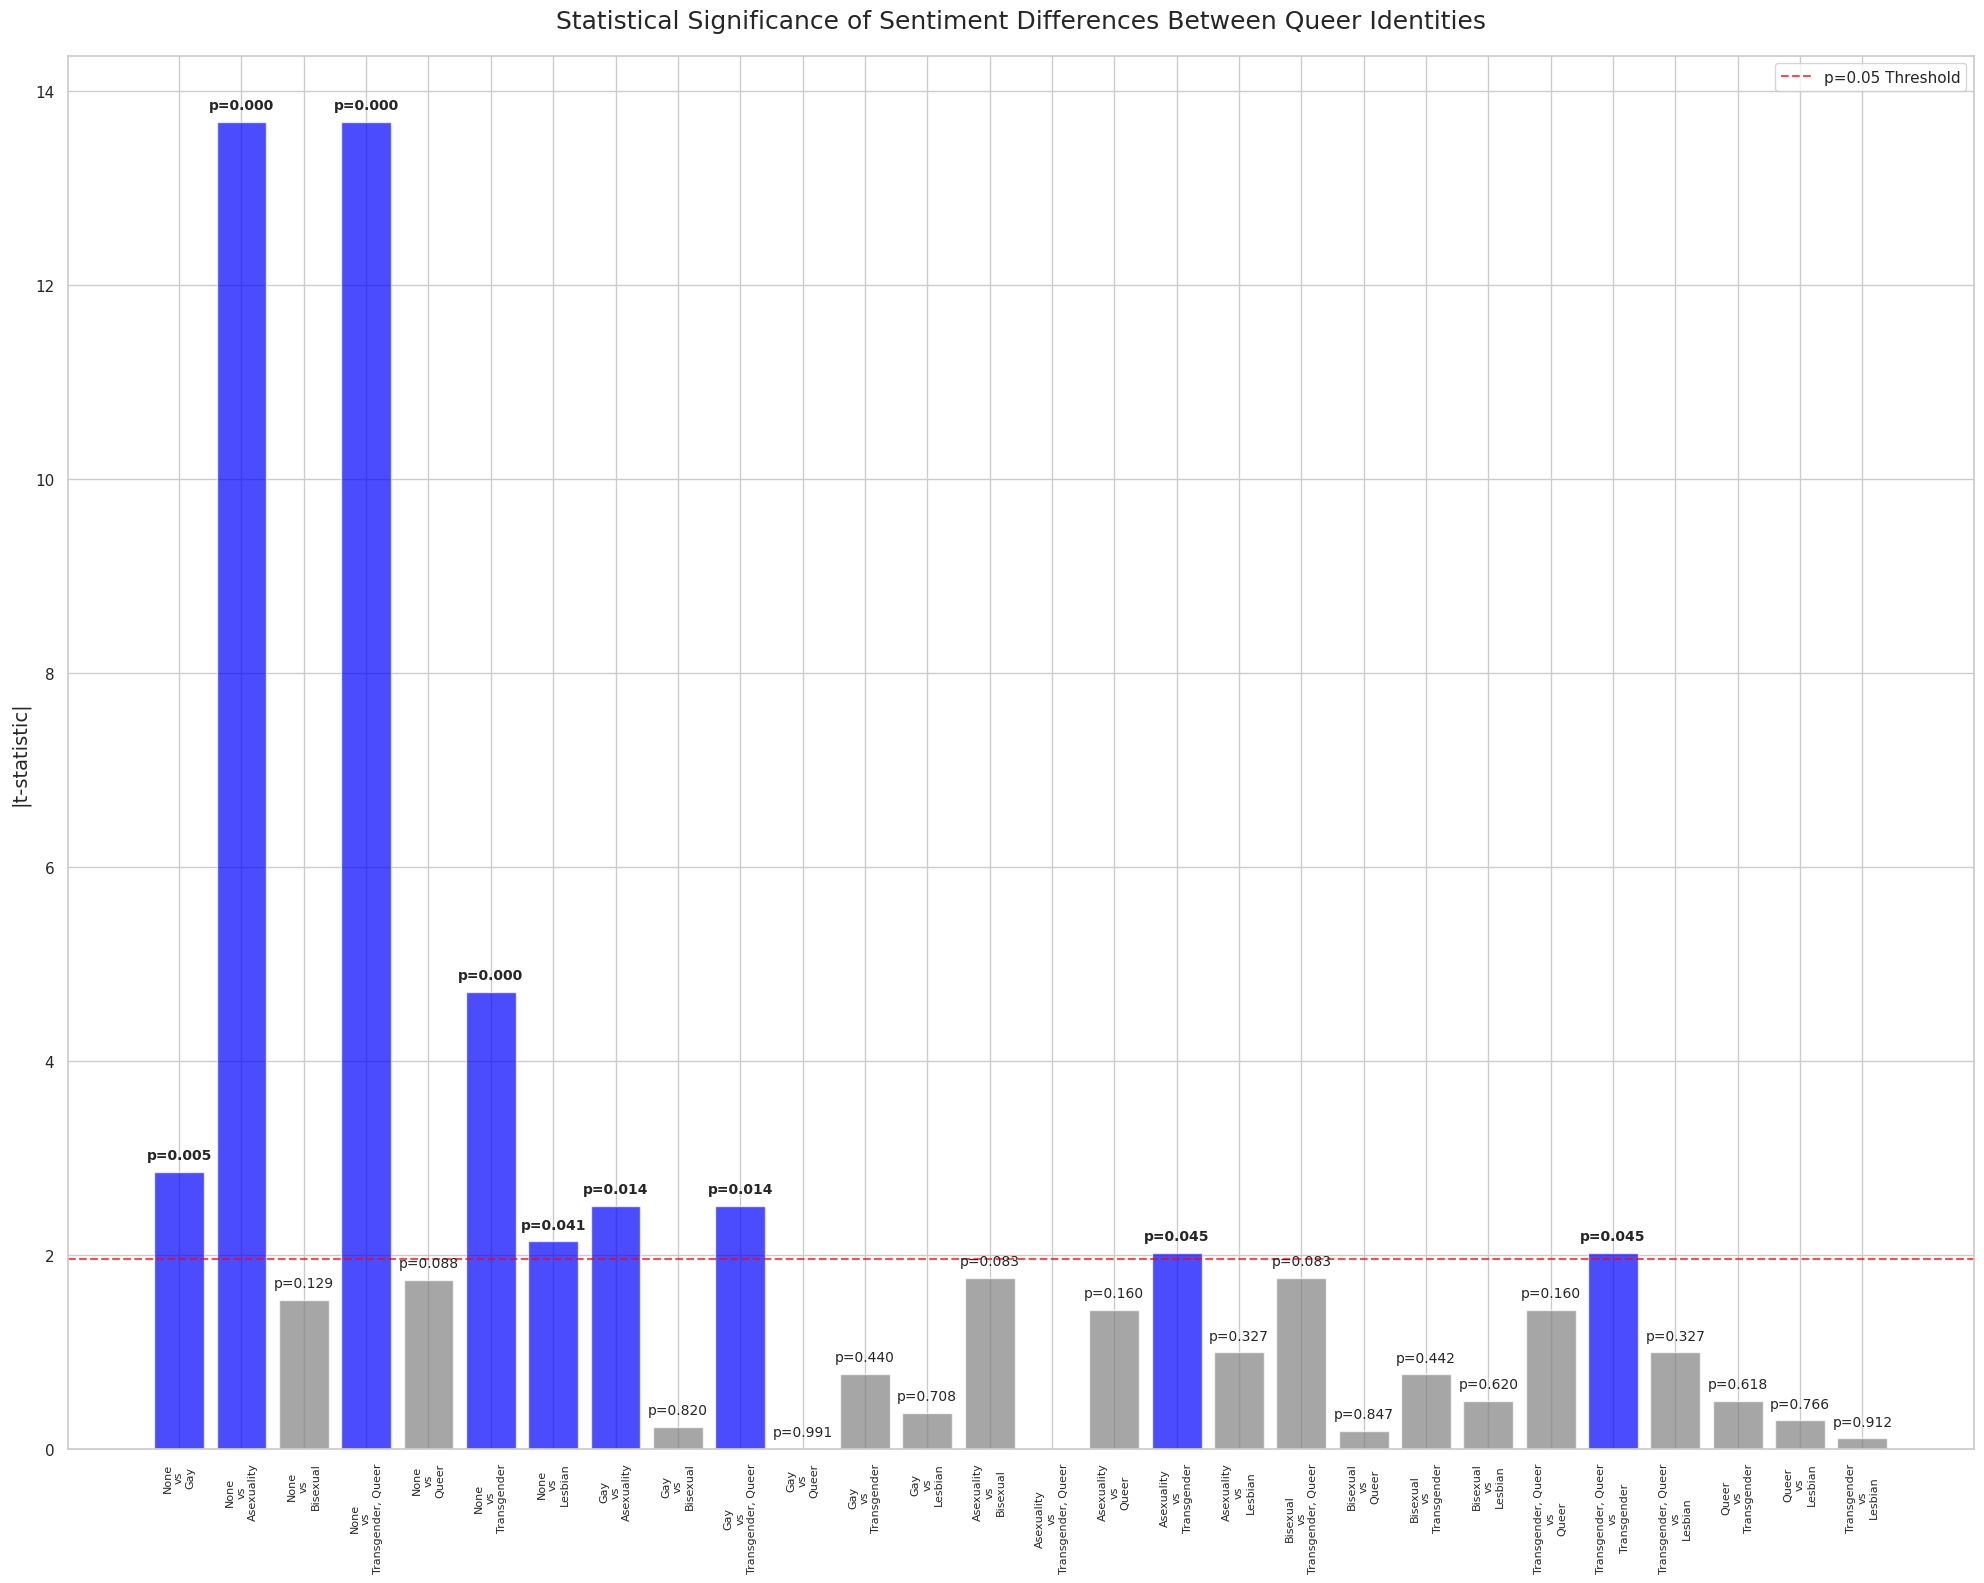

Queer identity significance testing chart saved.


In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

# Step 1: Sentiment Distribution by Queer Identity Group - Stacked Bar Chart
if 'queer_identity' in results_df.columns:
    queer_viz_df = results_df[results_df['queer_identity'].notna() &
                              (results_df['queer_identity'] != '')].copy()

    exploded_df = queer_viz_df.assign(queer_identity=queer_viz_df['queer_identity'].str.split(',')).explode('queer_identity')
    exploded_df['queer_identity'] = exploded_df['queer_identity'].str.strip()

    queer_cross_new = pd.crosstab(
        exploded_df['queer_identity'],
        exploded_df['bert_label'],
        normalize='index'
    ) * 100

    identity_counts = exploded_df['queer_identity'].value_counts()

    # Create Stacked Bar Chart
    plt.figure(figsize=(14, 8))

    bottom = np.zeros(len(queer_cross_new))
    x = np.arange(len(queer_cross_new.index))

    # Plot each sentiment
    for sentiment in ['positive', 'negative']:
        values = queer_cross_new[sentiment].values
        bars = plt.bar(x, values, bottom=bottom, label=sentiment, color=colors[sentiment])
        bottom += values

        # Add percentages on top of the bars
        for i, bar in enumerate(bars):
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width() / 2, bottom[i] - height / 2, f'{height:.1f}%',
                     ha='center', va='center', color='white', fontsize=10)

    plt.title('Sentiment Distribution by Queer Identity Group', fontsize=16)
    plt.xlabel('Queer Identity', fontsize=14)
    plt.ylabel('Percentage (%)', fontsize=14)

    # Capitalize the first letter of each word in the label
    plt.xticks(ticks=x, labels=[f"{identity.title()}\n(n={identity_counts.get(identity, 0)})" for identity in queer_cross_new.index], rotation=45)

    plt.legend(title='Sentiment Category')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.ylim(0, 100)
    plt.tight_layout()

    plt.savefig(figures_dir +'BERT_queer_sentiment_distribution.png', dpi=300)
    plt.show()
    plt.close()

    print("Queer identity sentiment distribution chart saved.")


# Step 2: Sentiment Distribution Heatmap by Queer Identity
if 'queer_identity' in results_df.columns:
    queer_viz_df = results_df[results_df['queer_identity'].notna() &
                              (results_df['queer_identity'] != '')].copy()

    exploded_df = queer_viz_df.assign(queer_identity=queer_viz_df['queer_identity'].str.split(',')).explode('queer_identity')
    exploded_df['queer_identity'] = exploded_df['queer_identity'].str.strip()

    queer_cross_new = pd.crosstab(
        exploded_df['queer_identity'],
        exploded_df['bert_label'],
        normalize='index'
    ) * 100

    plt.figure(figsize=(10, 8))
    ax = sns.heatmap(queer_cross_new, annot=True, fmt='.1f', cmap='YlGnBu',
                     linewidths=.5, cbar_kws={'label': 'Percentage (%)'})

    plt.title('Sentiment Distribution Heatmap by Queer Identity', fontsize=18, pad=20)

    # Capitalize the first letter of each word in the label for both x and y ticks
    ax.set_xticklabels([x.title() for x in queer_cross_new.columns], rotation=45, ha="right")
    ax.set_yticklabels([y.title() for y in queer_cross_new.index], rotation=0)

    # Ensure the ticks align properly
    plt.tight_layout()
    plt.savefig(figures_dir + 'BERT_queer_sentiment_heatmap.png', dpi=300)
    plt.show()
    plt.close()

    print("Queer identity sentiment heatmap saved.")



# Step 3: Statistical Significance Testing Between Queer Identity Groups
if 'queer_identity' in results_df.columns:
    results_df['sentiment_score'] = results_df['bert_label'].map({
        'positive': 1, 'neutral': 0, 'negative': -1
    })

    queer_categories = [q for q in results_df['queer_identity'].unique()
                       if pd.notna(q) and q != '']

    if len(queer_categories) >= 2:
        queer_sig = []
        for i in range(len(queer_categories)):
            for j in range(i+1, len(queer_categories)):
                q1, q2 = queer_categories[i], queer_categories[j]
                scores1 = results_df[results_df['queer_identity'] == q1]['sentiment_score']
                scores2 = results_df[results_df['queer_identity'] == q2]['sentiment_score']

                if len(scores1) > 5 and len(scores2) > 5:  # Ensure enough data points for t-test
                    t_stat, p_value = stats.ttest_ind(scores1, scores2, equal_var=False)
                    queer_sig.append({
                        'Group 1': q1,
                        'Group 2': q2,
                        'Group 1 Mean': scores1.mean(),
                        'Group 2 Mean': scores2.mean(),
                        't-statistic': t_stat,
                        'p-value': p_value,
                        'Significant': p_value < 0.05
                    })

        if queer_sig:
            sig_df = pd.DataFrame(queer_sig)
            sig_df.to_csv(figures_dir + 'BERT_queer_significance_tests.csv', index=False)

            # Plot the t-statistics
            plt.figure(figsize=(20, 16))
            for i, row in sig_df.iterrows():
                color = 'blue' if row['Significant'] else 'gray'
                plt.bar(i, abs(row['t-statistic']), color=color, alpha=0.7)
                plt.text(i, abs(row['t-statistic'])+0.1, f"p={row['p-value']:.3f}",
                         ha='center', va='bottom', fontsize=10,
                         fontweight='bold' if row['Significant'] else 'normal')

            plt.axhline(y=1.96, color='red', linestyle='--', alpha=0.7,
                        label='p=0.05 Threshold')

            # Capitalize the first letter of each word in the label for both groups
            plt.xticks(range(len(sig_df)),
                       [f"{row['Group 1'].title()}\nvs\n{row['Group 2'].title()}" for i, row in sig_df.iterrows()],
                       rotation=90, fontsize=8)
            plt.title('Statistical Significance of Sentiment Differences Between Queer Identities', fontsize=18, pad=20)
            plt.ylabel('|t-statistic|', fontsize=14)
            plt.legend()
            plt.tight_layout()
            plt.savefig(figures_dir + 'BERT_queer_significance_tests.png', dpi=300)
            plt.show()
            plt.close()

            print("Queer identity significance testing chart saved.")


subset

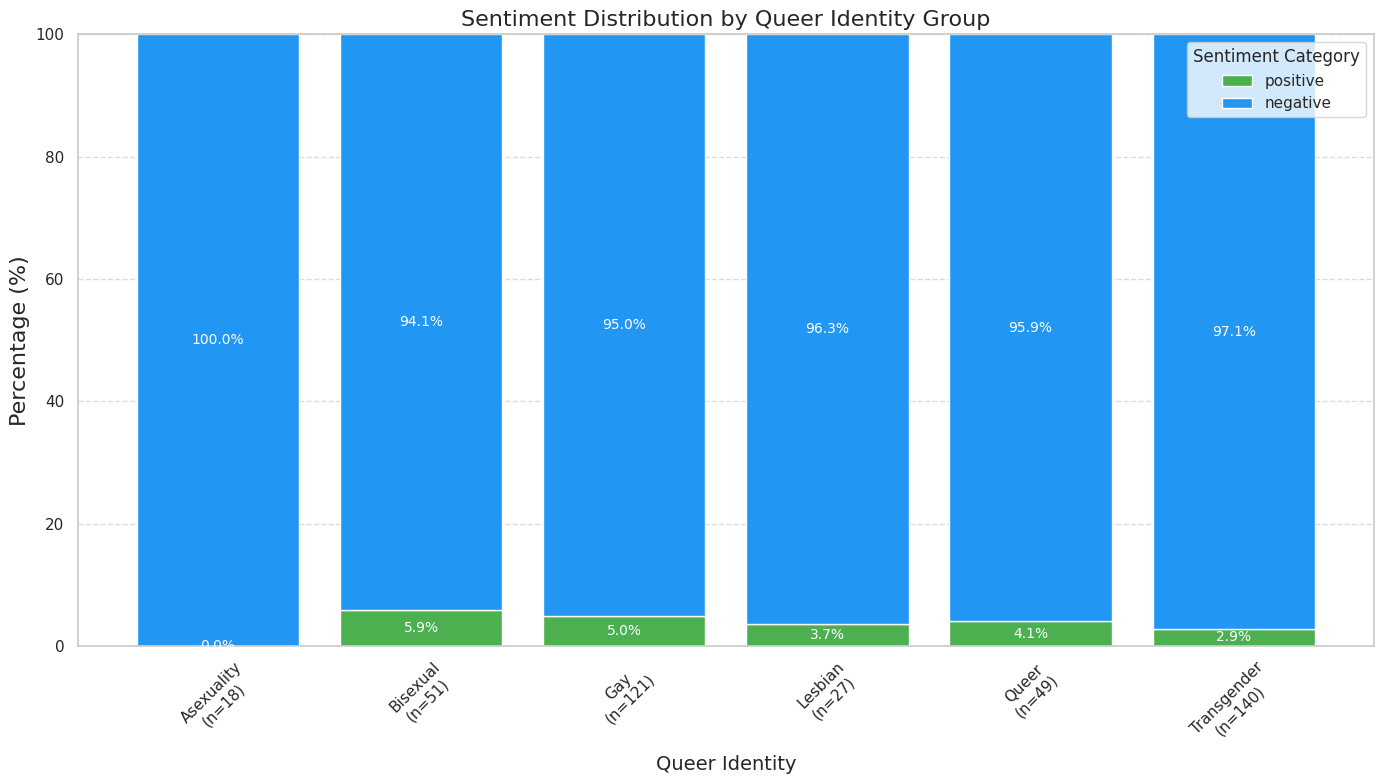

Queer identity sentiment distribution chart saved.


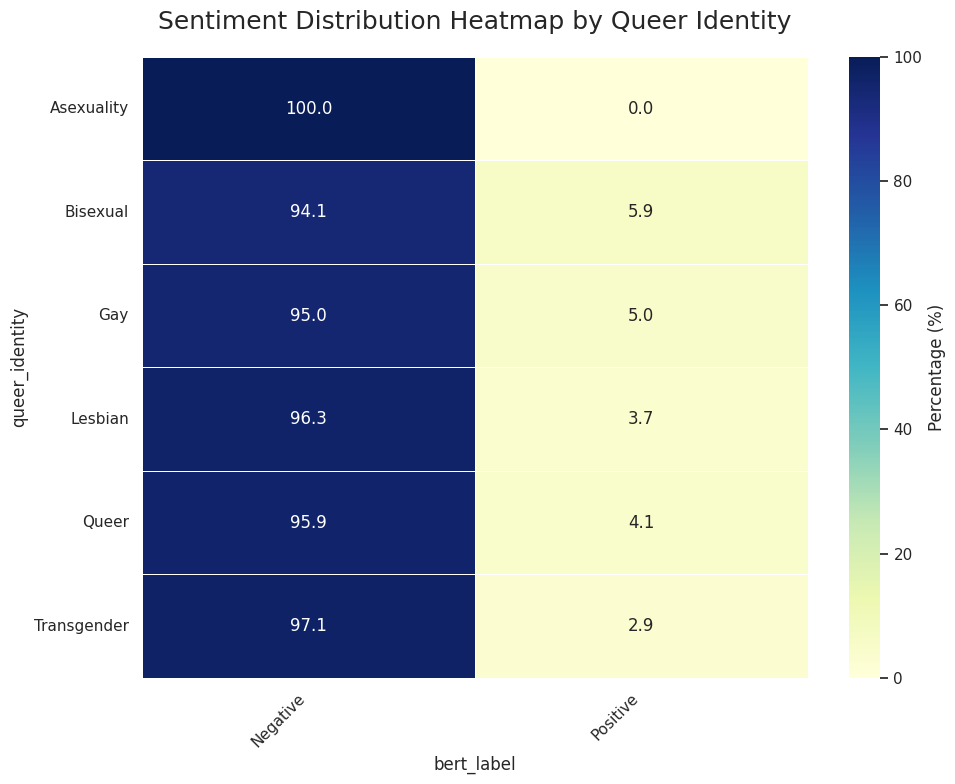

Queer identity sentiment heatmap saved.


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


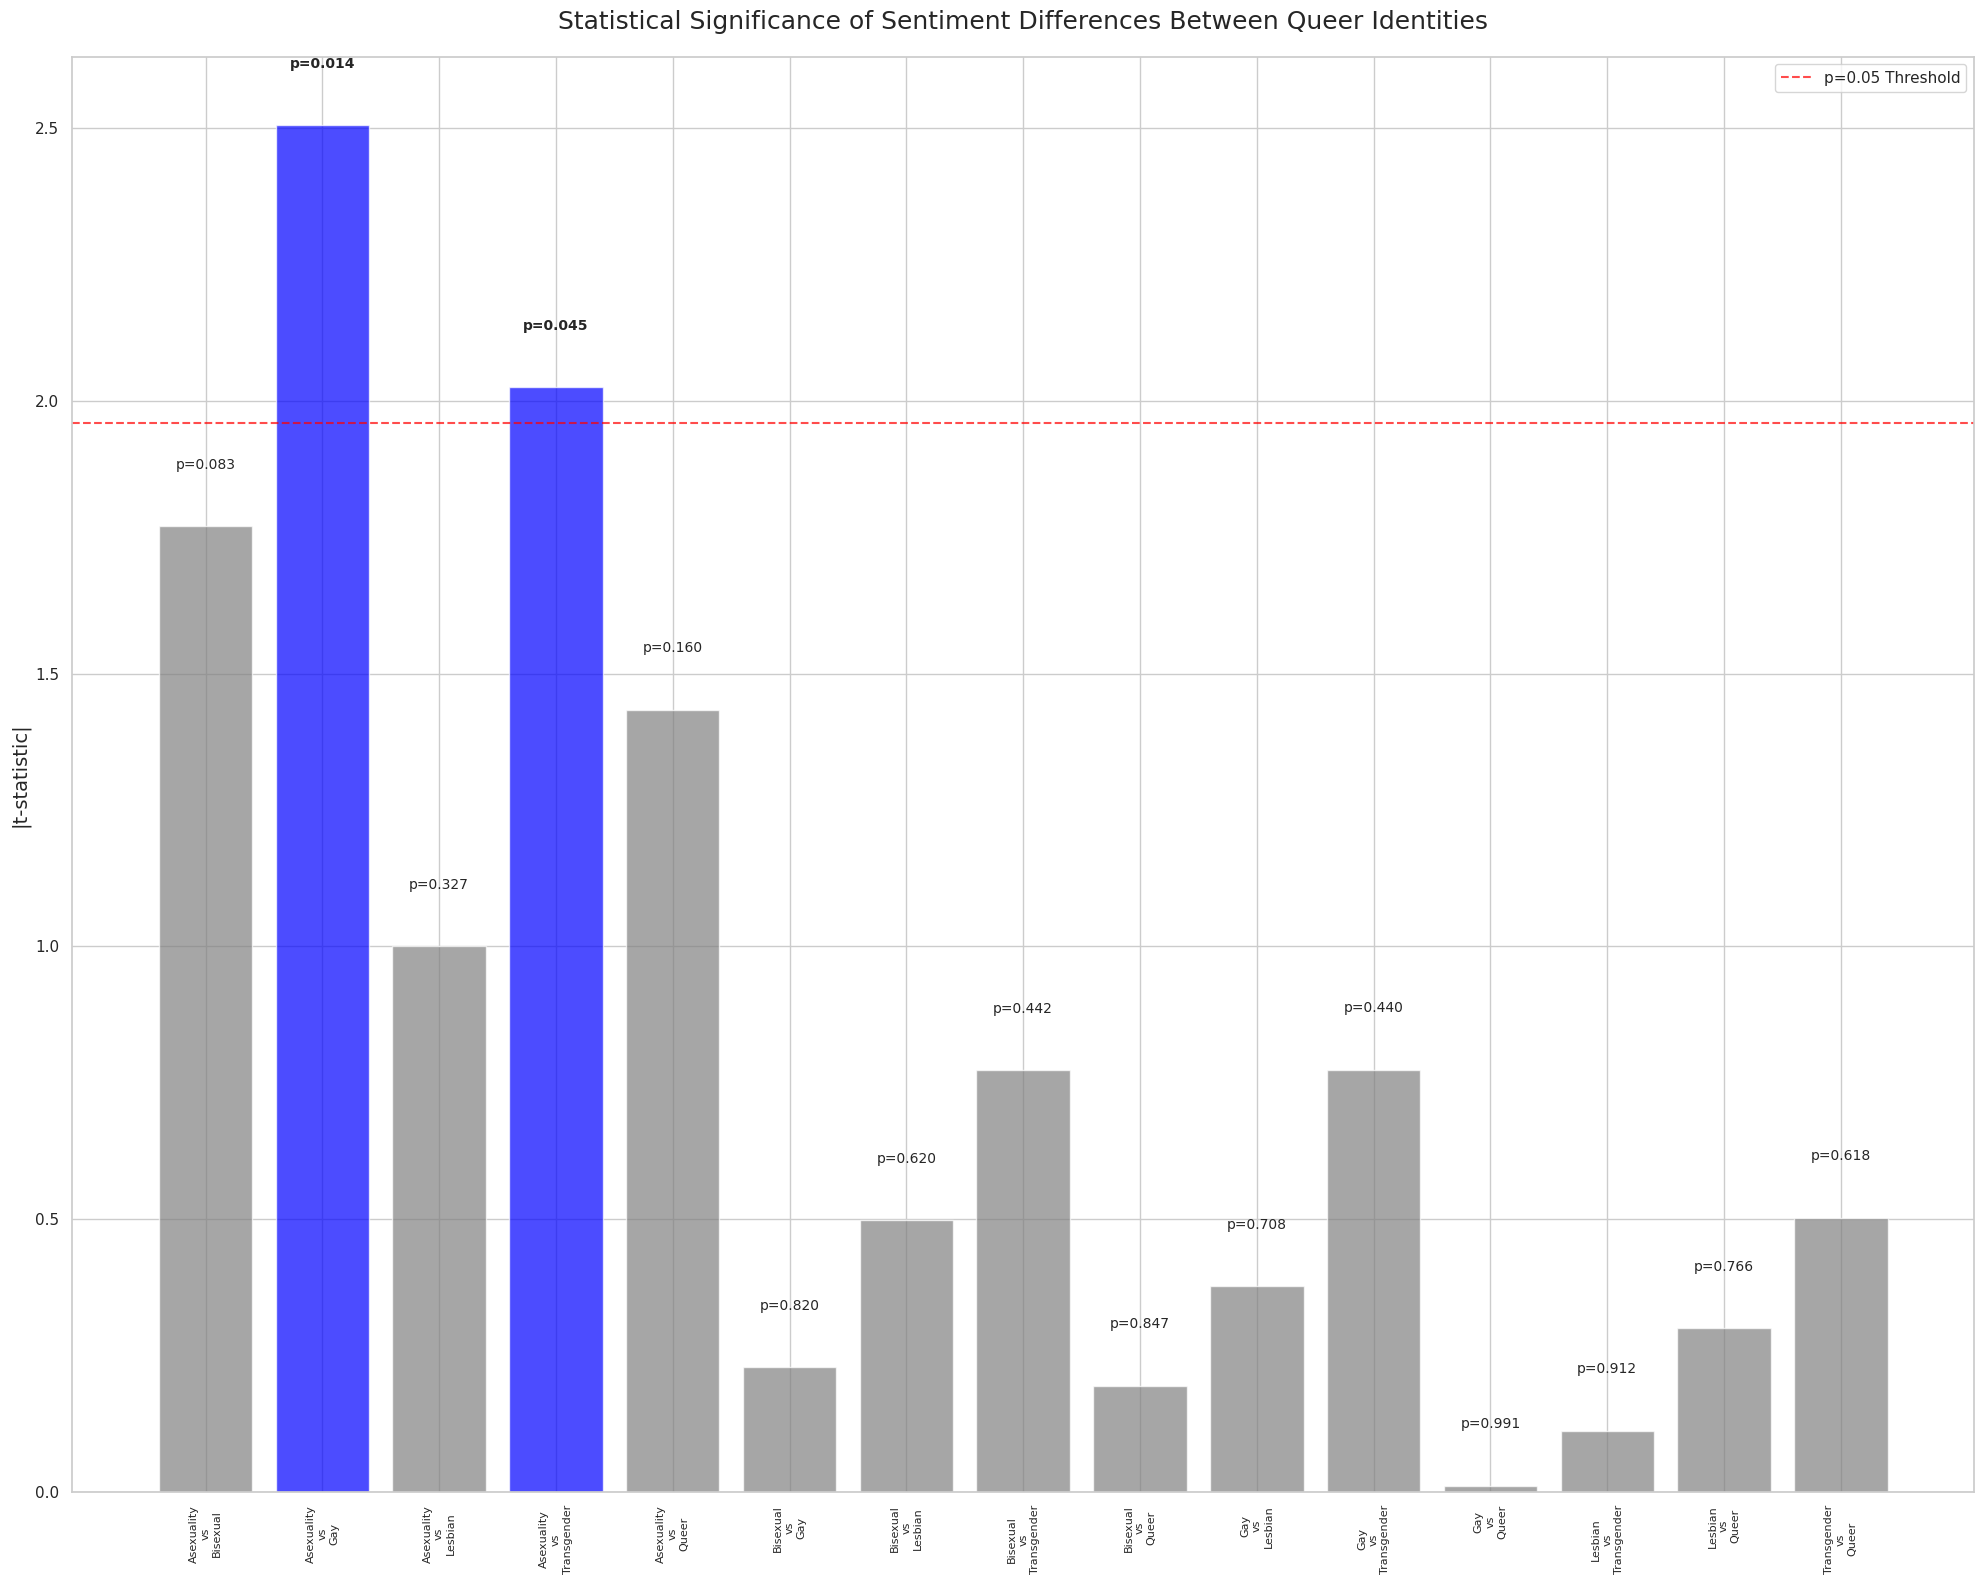

Queer identity significance testing chart saved.


In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

# Step 1: Sentiment Distribution by Queer Identity Group - Stacked Bar Chart
if 'queer_identity' in results_df.columns:
    queer_viz_df = results_df[results_df['queer_identity'].notna() &
                              (results_df['queer_identity'] != '')].copy()

    exploded_df = queer_viz_df.assign(queer_identity=queer_viz_df['queer_identity'].str.split(',')).explode('queer_identity')
    exploded_df['queer_identity'] = exploded_df['queer_identity'].str.strip()

    selected_identities = ['asexuality', 'bisexual', 'gay', 'lesbian', 'transgender', 'queer']
    exploded_df = exploded_df[exploded_df['queer_identity'].isin(selected_identities)]

    queer_cross_new = pd.crosstab(
        exploded_df['queer_identity'],
        exploded_df['bert_label'],
        normalize='index'
    ) * 100

    identity_counts = exploded_df['queer_identity'].value_counts()

    # Create Stacked Bar Chart
    plt.figure(figsize=(14, 8))

    bottom = np.zeros(len(queer_cross_new))
    x = np.arange(len(queer_cross_new.index))

    # Plot each sentiment
    for sentiment in ['positive', 'negative']:
        values = queer_cross_new[sentiment].values
        bars = plt.bar(x, values, bottom=bottom, label=sentiment, color=colors[sentiment])
        bottom += values

        # Add percentages on top of the bars
        for i, bar in enumerate(bars):
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width() / 2, bottom[i] - height / 2, f'{height:.1f}%',
                     ha='center', va='center', color='white', fontsize=10)

    plt.title('Sentiment Distribution by Queer Identity Group', fontsize=16)
    plt.xlabel('Queer Identity', fontsize=14)
    plt.ylabel('Percentage (%)', fontsize=16)

    # Capitalize the first letter of each word in the label
    plt.xticks(ticks=x, labels=[f"{identity.title()}\n(n={identity_counts.get(identity, 0)})" for identity in queer_cross_new.index], rotation=45)

    plt.legend(title='Sentiment Category')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.ylim(0, 100)
    plt.tight_layout()

    plt.savefig(figures_dir +'BERT_SUB_queer_sentiment_distribution.png', dpi=300)
    plt.show()
    plt.close()

    print("Queer identity sentiment distribution chart saved.")


# Step 2: Sentiment Distribution Heatmap by Queer Identity
if 'queer_identity' in results_df.columns:
    queer_viz_df = results_df[results_df['queer_identity'].notna() &
                              (results_df['queer_identity'] != '')].copy()

    exploded_df = queer_viz_df.assign(queer_identity=queer_viz_df['queer_identity'].str.split(',')).explode('queer_identity')
    exploded_df['queer_identity'] = exploded_df['queer_identity'].str.strip()

    selected_identities = ['asexuality', 'bisexual', 'gay', 'lesbian', 'transgender', 'queer']
    exploded_df = exploded_df[exploded_df['queer_identity'].isin(selected_identities)]

    queer_cross_new = pd.crosstab(
        exploded_df['queer_identity'],
        exploded_df['bert_label'],
        normalize='index'
    ) * 100

    plt.figure(figsize=(10, 8))
    ax = sns.heatmap(queer_cross_new, annot=True, fmt='.1f', cmap='YlGnBu',
                     linewidths=.5, cbar_kws={'label': 'Percentage (%)'})

    plt.title('Sentiment Distribution Heatmap by Queer Identity', fontsize=18, pad=20)

    # Capitalize the first letter of each word in the label for both x and y ticks
    ax.set_xticklabels([x.title() for x in queer_cross_new.columns], rotation=45, ha="right")
    ax.set_yticklabels([y.title() for y in queer_cross_new.index], rotation=0)

    # Ensure the ticks align properly
    plt.tight_layout()
    plt.savefig(figures_dir + 'BERT_SUB_queer_sentiment_heatmap.png', dpi=300)
    plt.show()
    plt.close()

    print("Queer identity sentiment heatmap saved.")



# Step 3: Statistical Significance Testing Between Queer Identity Groups
if 'queer_identity' in results_df.columns:
    results_df['sentiment_score'] = results_df['bert_label'].map({
        'positive': 1, 'neutral': 0, 'negative': -1
    })

    queer_categories = ['asexuality', 'bisexual', 'gay', 'lesbian', 'transgender', 'queer']

    if len(queer_categories) >= 2:
        queer_sig = []
        for i in range(len(queer_categories)):
            for j in range(i+1, len(queer_categories)):
                q1, q2 = queer_categories[i], queer_categories[j]
                scores1 = results_df[results_df['queer_identity'] == q1]['sentiment_score']
                scores2 = results_df[results_df['queer_identity'] == q2]['sentiment_score']

                if len(scores1) > 5 and len(scores2) > 5:  # Ensure enough data points for t-test
                    t_stat, p_value = stats.ttest_ind(scores1, scores2, equal_var=False)
                    queer_sig.append({
                        'Group 1': q1,
                        'Group 2': q2,
                        'Group 1 Mean': scores1.mean(),
                        'Group 2 Mean': scores2.mean(),
                        't-statistic': t_stat,
                        'p-value': p_value,
                        'Significant': p_value < 0.05
                    })

        if queer_sig:
            sig_df = pd.DataFrame(queer_sig)
            sig_df.to_csv(figures_dir + 'BERT_SUB_queer_significance_tests.csv', index=False)

            # Plot the t-statistics
            plt.figure(figsize=(20, 16))
            for i, row in sig_df.iterrows():
                color = 'blue' if row['Significant'] else 'gray'
                plt.bar(i, abs(row['t-statistic']), color=color, alpha=0.7)
                plt.text(i, abs(row['t-statistic'])+0.1, f"p={row['p-value']:.3f}",
                         ha='center', va='bottom', fontsize=10,
                         fontweight='bold' if row['Significant'] else 'normal')

            plt.axhline(y=1.96, color='red', linestyle='--', alpha=0.7,
                        label='p=0.05 Threshold')

            # Capitalize the first letter of each word in the label for both groups
            plt.xticks(range(len(sig_df)),
                       [f"{row['Group 1'].title()}\nvs\n{row['Group 2'].title()}" for i, row in sig_df.iterrows()],
                       rotation=90, fontsize=8)
            plt.title('Statistical Significance of Sentiment Differences Between Queer Identities', fontsize=18, pad=20)
            plt.ylabel('|t-statistic|', fontsize=14)
            plt.legend()
            plt.tight_layout()
            plt.savefig(figures_dir + 'BERT_SUB_queer_significance_tests.png', dpi=300)
            plt.show()
            plt.close()

            print("Queer identity significance testing chart saved.")
